<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries

# Data handling
import numpy as np
import pandas as pd

# machine learning
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Importing deep learning libraries

In [3]:
# !pip install streamlit

In [4]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 9.9 MB/s 
     |████████████████████████████████| 895 kB 31.8 MB/s 
     |████████████████████████████████| 6.5 MB 38.1 MB/s 
     |████████████████████████████████| 596 kB 45.7 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from transformers import pipeline
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [6]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 9.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ae00702c26054dfced44e3120ced6887a1dee9025c07eca650cbb401b01fcd59
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [7]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading the data as pandas dataframe
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')
xls.sheet_names

['Concepts']

In [10]:
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [11]:
data_science_df.head(2)

,Topics,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 21
0,"Integers, Floats and Booleans",Python language was created in 1991\n\nLike an...,There are 32 keywords in C++ and 35 keywords i...,"data types (Numeric, Boolean, String, Datetime)","Integers or whole numbers (1,2,-5,1000), Float...","Arithmatic Operation (addition[+], subtraction...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name (must start with letter or under...,Boolean Variable (true or false)\n\nComparison...,...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,order of precedence in python\n\ni) Parenthese...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,The pprint module provides a capability to “pr...,NaN
1,Strings-Intro,"a word, a phrase, a sentence, a paragraph or a...","sequence, indexing","string' or ""string"" \n\ndouble quotes are used...",print('Use \n to print a new line'),string indexing begins from 0,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",string[:] If you do not specify the starting ...,"slicing with step size, string[3:14:2] means f...",...,"String functions, print(), type(), len()\n\nor...","String methods \n\nstring.lower(), string.uppe...",first_name = 'Rahul'\nlast_name = 'Modi'\n\nfu...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,for color print\n\nfrom termcolor import color...,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [12]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Topics       99 non-null     object
 1   Concept-1    99 non-null     object
 2   Concept-2    94 non-null     object
 3   Concept-3    94 non-null     object
 4   Concept-4    92 non-null     object
 5   Concept-5    92 non-null     object
 6   Concept-6    88 non-null     object
 7   Concept-7    87 non-null     object
 8   Concept-8    86 non-null     object
 9   Concept-9    83 non-null     object
 10  Concept-10   79 non-null     object
 11  Concept-11   76 non-null     object
 12  Concept-12   71 non-null     object
 13  Concept-13   66 non-null     object
 14  Concept-14   60 non-null     object
 15  Concept-15   55 non-null     object
 16  Concept-16   45 non-null     object
 17  Concept-17   41 non-null     object
 18  Concept-18   38 non-null     object
 19  Concept-19   31 non-null     ob

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [13]:
relevant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [14]:
data_science_df_clean=data_science_df[relevant_features]

In [15]:
# Creating documents with all individual cell
data_science_df_clean=pd.DataFrame(data_science_df_clean.values.flatten(), columns=['documents'])
data_science_df_clean.head(2)

,documents
0,Python language was created in 1991\n\nLike an...
1,There are 32 keywords in C++ and 35 keywords i...


In [16]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True) 

In [17]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1979
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  1401 non-null   object
dtypes: object(1)
memory usage: 21.9+ KB


In [18]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['documents']=='No data')]

,documents
480,No data
760,No data
1300,No data
1320,No data
1420,No data


In [19]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='No data')].reset_index()

In [20]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [21]:
data_science_df_clean['documents']

0       Python language was created in 1991\n\nLike an...
1       There are 32 keywords in C++ and 35 keywords i...
2         data types (Numeric, Boolean, String, Datetime)
3       Integers or whole numbers (1,2,-5,1000), Float...
4       Arithmatic Operation (addition[+], subtraction...
                              ...                        
1391    Note-8: By birth, human beings have all the ge...
1392    Human learning model after birth is either a c...
1393    \nA picture is worth a thousand words, a video...
1394    Spirituality is not a dimension like other str...
1395    We know that at expectation probability is awa...
Name: documents, Length: 1396, dtype: object

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

Text Pre-processing

In [22]:
# writing text pre-processing function
def text_process(text):
    text = text.lower()    # converting to lowercase
    text =[char for char in text if char not in string.punctuation] # removing punctuations
    text=''.join(text) 
    text=[word for word in text.split() if word not in stopwords.words('english')]  # removing stopwords
    # stemming operation is not performed as it is degrading the performance of our question-answer model
    # stemmer = SnowballStemmer("english") 
    # text=' '.join(text) 
    # text = [stemmer.stem(word) for word in text.split()] # stemming operation
    return ' '.join(text)

In [23]:
text_process('I am Running in the field')

'running field'

In [24]:
# Wrting top words function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.apply(text_process).values) # also performing text processing
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

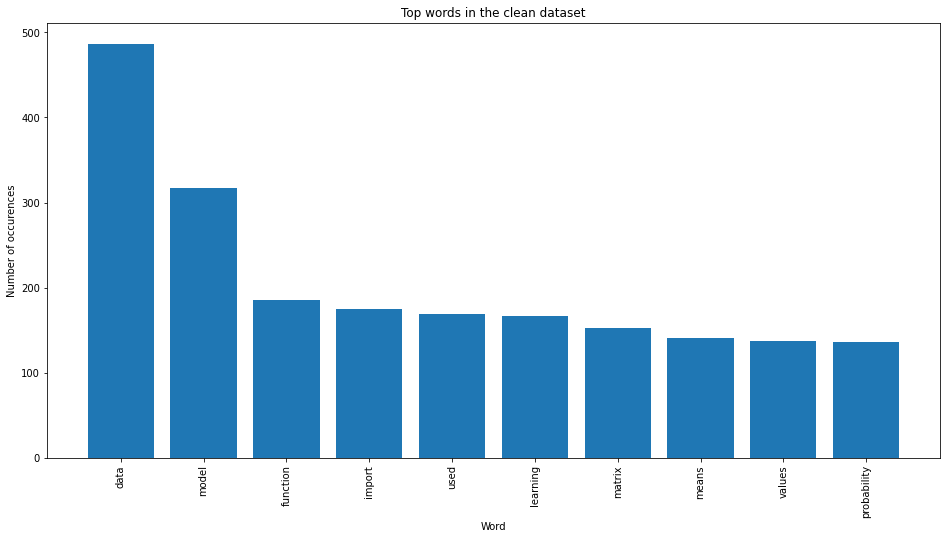

In [25]:
# Ploting top words in the entire dataset
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the clean dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

In [26]:
# Document processing
data_science_df_clean['documents_processed'] = data_science_df_clean['documents'].apply(text_process)
# Considering first 50 letters as the main concept of the document
data_science_df_clean['documents_processed'] = [k[:50] for k in data_science_df_clean.documents_processed] 
# Creating new column for first 100 letters
data_science_df_clean['first_100_letters']= [k[:100] for k in data_science_df_clean.documents] 

In [27]:
data_science_df_clean.head(2)

,documents,documents_processed,first_100_letters
0,Python language was created in 1991\n\nLike an...,python language created 1991 like computer pro...,Python language was created in 1991\n\nLike an...
1,There are 32 keywords in C++ and 35 keywords i...,32 keywords c 35 keywords python python keywor...,There are 32 keywords in C++ and 35 keywords i...


# **Building of Topic Model**

In [28]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean.documents_processed.values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python language created 1991 like computer program
Document after vectorization: 
  (0, 2364)	1
  (0, 1611)	1
  (0, 682)	1
  (0, 16)	1
  (0, 1658)	1
  (0, 574)	1
  (0, 2326)	1


Building LDA model with sklearn and hyperparameter tuning

In [29]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [30]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Model Perplexity:  3906.42


Let's visualize the LDA model with pyLDAvis

In [31]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  22.883816
0       51.163364 -159.968018       2        1  21.552715
2      -73.144554   21.523815       3        1  20.669756
1      -66.410133 -110.606438       4        1  17.649816
3       54.417324   12.443444       5        1  17.243897, topic_info=            Term       Freq      Total Category  logprob  loglift
1404      import  43.000000  43.000000  Default  30.0000  30.0000
2451  regression  23.000000  23.000000  Default  29.0000  29.0000
1953     network  26.000000  26.000000  Default  28.0000  28.0000
2636         set  23.000000  23.000000  Default  27.0000  27.0000
1636    learning  42.000000  42.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
727         data   9.406887  93.163759   Topic5  -5.0595  -0.5352
1777      matrix   6.466058  33.076939   Topic5  -5.4344   0.1254
3122        used   5.567685  35.529976   Topic5  -5.5840  -0.0957
1788     measure   4.320146  11.493681   Topic5  -5.8377   0.7792
1020       error   4.190577  11.451409   Topic5  -5.8682   0.7524

[330 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4         5  0.941580      100
46        2  0.917315      300
69        5  0.941580       a2
88        3  0.920020  account
96        2  0.917315  actions
...     ...       ...      ...
3268      4  0.936861     wsgi
3274      3  0.920020       xi
3276      4  0.936861     xlwt
3304      4  0.703739      zip
3310      5  0.707736       σ1

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])

Let's see the dominant topic in each document

In [32]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix) # Takes word presence embeding as input and gives contextual embedding as output

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.900000,0.030000,0.030000,0.030000,0.030000,0
Doc1,0.030000,0.030000,0.900000,0.030000,0.030000,2
Doc2,0.030000,0.030000,0.030000,0.030000,0.880000,4
Doc3,0.880000,0.030000,0.030000,0.030000,0.030000,0
Doc4,0.030000,0.870000,0.030000,0.030000,0.030000,1
Doc5,0.030000,0.030000,0.030000,0.030000,0.880000,4
Doc6,0.030000,0.030000,0.900000,0.030000,0.030000,2
Doc7,0.030000,0.030000,0.870000,0.030000,0.030000,2
Doc8,0.030000,0.880000,0.030000,0.030000,0.030000,1
Doc9,0.030000,0.030000,0.030000,0.030000,0.900000,4


Review topics distribution across documents

In [33]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,4,327
1,0,302
2,2,287
3,3,241
4,1,239


Let's see the Topic’s keywords

In [34]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001z,049,05,10,100,100000,104,10k,123n,1251000,...,zip,zone,zresults,zscore,zwtransposexb,γα,σ1,σ2,σytest,σyw0w1x1w2x2w3x3wnxn2
Topic0,0.200004,0.200004,0.200006,0.200005,0.200004,0.200004,0.200006,1.199973,0.200004,1.199973,...,0.200003,0.200008,0.200005,1.199615,0.200006,0.200004,0.200004,1.196917,0.200005,0.200005
Topic1,0.200005,0.200005,0.200006,0.200006,0.200004,0.200005,0.200007,0.200007,0.200005,0.200007,...,3.199987,0.200008,1.199981,1.200349,0.200007,0.200005,0.200005,0.200018,1.199979,1.199979
Topic2,0.200005,1.199981,0.200006,0.200005,0.200004,0.200004,1.199974,0.200007,0.200005,0.200007,...,0.200003,0.200007,0.200005,0.200012,0.200007,0.200005,0.200004,0.200016,0.200005,0.200005
Topic3,1.199981,0.200005,0.200006,2.199980,2.199984,1.199982,0.200007,0.200007,1.199981,0.200007,...,0.200004,0.200008,0.200006,0.200013,0.200008,1.199982,3.199982,3.206750,0.200006,0.200006
Topic4,0.200004,0.200004,1.199976,0.200005,0.200004,0.200004,0.200006,0.200006,0.200004,0.200006,...,0.200003,1.199969,0.200004,0.200010,1.199972,0.200004,0.200004,1.196299,0.200005,0.200005


Get the top 15 keywords each topic

In [35]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,import,network,model,neural,image,use,data,layer,used,docker,time,classification,csv,similar,test
Topic 1,import,matrix,file,word,data,linear,like,database,select,line,ml,vs,model,convolution,bias
Topic 2,set,learning,data,machine,number,method,mean,used,use,called,sample,array,probability,variable,list
Topic 3,regression,linear,means,function,data,value,vector,list,create,matrix,creating,supervised,spark,ml,range
Topic 4,data,model,learning,pandas,random,probability,matrix,types,single,distribution,string,multiple,like,application,machine


# **Checking general answering ability of 'question-answering' model**

In [36]:
question='what is the daily task of a data scientist?'
context='the task of human being is to be honest.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.5999396443367004, 'start': 33, 'end': 39, 'answer': 'honest'}


In [37]:
question='what is the daily task of a data scientist'
context='the role of data scientist is to analyse data.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.485635370016098, 'start': 30, 'end': 45, 'answer': 'to analyse data'}


Thus, bad question, context pair gives bad result by 'question-answering' model 

# **Building of Question-Answering Model-1**

CountVec and Question-Answering Model

In [38]:
# Writing a function for question answering
def answer_me(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_processed = text_process(question)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  count_vectorizer_model = CountVectorizer(stop_words='english', max_features=4000) # Downloading pre-trained vectorization model (CountVectorizer)
  document_term_matrix = count_vectorizer_model.fit_transform(data_science_df_clean.documents_processed.values)

  # CountVec question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=document_term_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                        
      else:
        answer=print("Sorry ! I have no experience for this question.")
        
  except:
    answer=print("There is an exception")
    
  return answer, short_answer_dict

In [39]:
answer_me("what is cosine similarity?")

Cosine similarity measures the similarity between two vectors by calculating the cosine of the angle between the two vectors.

If the ange between the vectors is zero, then cosine similarity is 1, means the vectors (word, expression or sentence) are fully similar. Consine similarity 0 means no match

> By using cosine similarity,we can easily find how two words (word embedding vectors) are similar or opposite to each other.


(None,
 {0.148636132478714: 'data mining and information retrieva',
  0.32094284892082214: 'measures the similarity between two vectors'})

# **Building of Question-Answering Model-2**

TFIDF and Question-Answering Model

In [40]:
# Writing a function for question answering
def answer_me2(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_processed = text_process(question)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  tfidf_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
  document_tfidf_matrix=tfidf_vectorizer.fit_transform(data_science_df_clean.documents_processed.values)

  # tfidf question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_tfidf_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_tfidf_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:    # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                      
      else:
        answer=print("Sorry ! I have no experience for this question.")
          
  except:
    answer=print("There is an exception")
      
  return answer, short_answer_dict

In [41]:
answer_me2("what is cosine similarity")

Sorry ! I have no experience for this question.


(None, {})

# **Building of Question-Answering Model-3**

LDA and Question-Answering Model

In [42]:
# Writing a function for question answering
def answer_me3(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_processed = text_process(question)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  document_lda_matrix=best_lda_model.transform(document_term_matrix)

  # LDA question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_lda_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_lda_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                        
      else:
        answer=print("Sorry ! I have no experience for this question.")
            
  except:
    answer=print("There is an exception")
          
  return answer, short_answer_dict

In [43]:
answer_me3("what is cosine similarity")

For finding single bounding box

3. Non-max supression

When there are multiple bounding boxes for same object, then this algorithm ignores the non-max bounding boxes (probabillity of less than maximum).

> Finally we get non-max supressed output


(None,
 {0.03276347741484642: 'returns a list of tuples',
  0.03312456235289574: 'Array Manipulation\n\nnp.reshape',
  0.03387729078531265: 'l',
  0.04044988006353378: 'H1 or Ha or HA) is the statement',
  0.04161185398697853: 'Continuous and Discrete Random variables',
  0.04306285083293915: 'we take all the item profiles the user has interacted and average them',
  0.043662186712026596: 'PDF',
  0.04751719534397125: 'api request through postman like app or directly through python interpreter',
  0.048854466527700424: 'OrderNumber int NOT NULL',
  0.05004996061325073: 'IQR\n\nQ1-1.5',
  0.05105501785874367: '∫x^n dx =x^(n+1)',
  0.05743885412812233: 'k',
  0.059760503470897675: 'A square matrix',
  0.06099855899810791: 'lower',
  0.0623348206281662: 'Loan Default',
  0.06390420347452164: 'can redirect t',
  0.06527502089738846: 'Definite Integrals',
  0.0661657527089119: 'Python Modules\nA module',
  0.06685154885053635: 'Very similar',
  0.06718284636735916: 'Understanding mathematic

# **Conclusion**

'glove-wiki-gigaword-300' word embeddings are not able to convert all the words of our dataset. Thus not used.

Here, countvec question-answering model is giving better answer than tfidf model

Here, countvec question-answering model is also giving better answer than lda model

In [ ]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])